# Data Question(s)
Q1. How many total auto accidents per year in Nashville?

Q2. Which region/city has the most accidents compared to other regions? 

Q3. What time of the year did the accident occur the most? 

Q4. Did the weather condition cause the accidents?

Q5. What is the accident rate Per year? What is Average fatality per year? What is Average injury per year?

Q6. Find Monthy, Weekly, Daily Average Accidents Per year.

Q7. Which zip_code has the most accidents?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
plt.style.use('ggplot')

In [2]:
#read 2017, 2018, 2019 combined csv file and keep only 17 columns

data = pd.read_csv(".\data\combined_csv.csv", 
                   index_col= None,
                   usecols=['Accident Number', 'Date and Time', 'Number of Motor Vehicles', 'Number of Injuries',
                           'Number of Fatalities', 'Property Damage', 'Hit and Run', 'Collision Type Description',
                           'Weather Description','Street Address','City','State',
                           'ZIP','Precinct','Latitude','Longitude','Mapped Location'],
                  dtype={'Accident Number': str, 'ZIP': str, 'Number of Injuries': float},
                  parse_dates =['Date and Time'],
                  na_values =[' ']
                  )

In [3]:
#fill blank cells in Property Damange columns with 'N':No
data['Property Damage'].fillna('N', inplace=True)

In [4]:
#All missing zip code are filled with 99999
data['ZIP'].fillna('99999', inplace=True)

In [5]:
#All blanks cells are filled with unknown/N/zero values due to insufficient information

data['Precinct'].fillna('UNKNOWN', inplace=True)
data['Latitude'].fillna('UNKNOWN', inplace=True)
data['Longitude'].fillna('UNKNOWN', inplace=True)
data['Mapped Location'].fillna('UNKNOWN', inplace=True)
data['Hit and Run'].fillna('N', inplace=True)
data['Collision Type Description'].fillna('UNKNOWN', inplace=True)
data['Street Address'].fillna('UNKNOWN', inplace=True)
data['Weather Description'].fillna('UNKNOWN', inplace=True)
data['Property Damage'].fillna('N', inplace=True)
data['Number of Motor Vehicles'].fillna(0, inplace=True)
data['Number of Fatalities'].fillna(0, inplace=True)

In [6]:
# data.info()

In [7]:
#data = data['Date and Time'].str.
data['Date'] = data['Date and Time'].dt.strftime('%Y-%b-%d')
data['Time'] = data['Date and Time'].dt.strftime('%H:%M:%S')
data.head(1)

,Accident Number,Date and Time,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Property Damage,Hit and Run,Collision Type Description,Weather Description,Street Address,City,State,ZIP,Precinct,Latitude,Longitude,Mapped Location,Date,Time
0,20170016695,2017-01-06 07:35:00,2.0,0.0,0.0,N,N,ANGLE,SNOW,PETTUS RD & PRESTON RD,ANTIOCH,TN,37013,SOUTH,36.0207,-86.665,POINT (-86.665 36.0207),2017-Jan-06,07:35:00


In [8]:
data[['Year', 'Month', 'Day']] = data['Date'].str.split('-', expand=True)

In [9]:
# data.info()

In [10]:
# Sepearate the dataset to individual year
data_2017 =data.loc[data['Year']== '2017']
data_2018 =data.loc[data['Year']== '2018']
data_2019 =data.loc[data['Year']== '2019']
data_2015 =data.loc[data['Year']== '2015']
data_2016 =data.loc[data['Year']== '2016']

---


# Write functions for the same analysis

In [11]:
def total_accident(df, year):
    """find total accident per year
    """
    total_traffic_accident =df['Accident Number'].count()
    print(f' Total Traffic accident in {year}: {total_traffic_accident}')

In [12]:

def total_vehicles(df, year):
    """find total accident per year
    """
    total_vehicles =df['Number of Motor Vehicles'].sum()
    print(f' Total Vehicles crash in {year}: {total_vehicles}')

In [13]:
def accident_by_city(data_year, year):
    """
    define function to find number of accidents by city
    """
    cities_year = data_year['City'].tolist()
    cities_year_count = dict((x, cities_year.count(x)) for x in set(cities_year))
    city_accident =pd.DataFrame.from_dict(cities_year_count, orient='index',columns =[f'Number_of_Accidents {year}'])
    city_accident_sorted=city_accident.sort_values(by=[f'Number_of_Accidents {year}'], ascending = False)
    return city_accident_sorted

In [14]:
def average_by(data_year, groupsBy, aggregateBy1, aggregateBy2, new_columname1, new_columname2, new_columname3, year):
    """Returns Three columns: Groupby column, Total column, Average Column         
    """
    data = data_year.groupby(groupsBy).agg({aggregateBy1: ['sum'],aggregateBy2: ['count'] })
    data = data.reset_index()
    data.columns = [new_columname1,new_columname2, new_columname3]
    data_sorted = data.sort_values(by=new_columname2, ascending = False)
    #total = data_sorted[new_columname2].sum()
    
    for ind, row in data_sorted.iterrows():
        data_sorted.loc[ind, 'Average'] = row[new_columname2] / row[new_columname3] #total *100
     
    return data_sorted


In [15]:
def accident_by_weather(data_year, year, number_of_year):
    """
    define function to find number of accidents by Weather Condition
    """
    condition_year = data_year['Weather Description'].tolist()
    condition_year_count = dict((x, condition_year.count(x)/number_of_year) for x in set(condition_year))
    condition_accident =pd.DataFrame.from_dict(condition_year_count, orient='index',columns =[f'Average Number of Accidents {year}'])
    condition_accident_sorted=condition_accident.sort_values(by=[f'Average Number of Accidents {year}'], ascending = False)
    return condition_accident_sorted

In [36]:
# function to plot desired series
def plot_series(df, x_series , y_series, plot_title, x_label, y_label, colors):
    """plotting desired series
    """

    plt.rcParams["figure.figsize"] = (6,4)
    ax = df.plot.bar(x= x_series,y= y_series, rot=90, color =colors)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(plot_title)


In [78]:
def injury_rate(data_year, year, VMT):
    """Find Average injury per accident
    """
    injury_year = data_year['Number of Injuries']
    total_injury = sum(injury_year)
    injury_person_per_100K_VMT = round(total_injury / VMT * 100000,2)
    print(f'Injuried Persons Per 100000 VMT in {year} : {injury_person_per_100K_VMT}')
    #return injury_rate_per_accident 

In [79]:
def fatality_rate(data_year, year, population):
    """Find Average fatality per accident
    """
    fatality_year = data_year['Number of Fatalities']
    total_fatality = int(sum(fatality_year))
    fatality_per_100K_population = round(total_fatality / population * 100000,2)
    print(f'Fatality Per 100000 Population in {year}: {fatality_per_100K_population}')
    #return fatality_rate_per_accident

In [40]:

def plot_accident_by_zip(df, plot_title, x_label, y_label, colors):
    """plot traffic accident by zip
    """
    # filter out city column and pass to list to iterate over the city columns
    zip_year = df['ZIP'].tolist()
    zip_count_year = dict((x, zip_year.count(x)) for x in set(zip_year))

    #create dataframe from result dictionary
    zip_count_year =pd.DataFrame.from_dict(zip_count_year, orient='index',columns =['Accidents_by_zip']) 
    zip_count_year= zip_count_year.sort_values(by='Accidents_by_zip', ascending = False)
    #zip_count_2017
    plt.rcParams["figure.figsize"] = (8,6)
    ax = zip_count_year.plot.bar(y='Accidents_by_zip', rot=90, color = colors)
    plt.xlabel(x_label);
    plt.ylabel(y_label);
    plt.title(plot_title);

In [48]:
def groupby_month_plot(data_year,plot_title, x_label,y_label, colors, number_of_number):
    """Group Accident by Month
       & plot line graph
    """
    by_month = (data_year.groupby('Month').agg({'Accident Number':['count']}))/number_of_number
    ordered = ['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun', 'Jul','Aug', 'Sep','Oct','Nov','Dec']
    by_month_ordered = by_month.reindex(ordered)
    by_month_ordered.plot(y='Accident Number', color=colors)
    plt.xlabel(x_label);
    plt.ylabel(y_label);
    plt.title(plot_title);

In [42]:
def monthly_weekly_daily_average_accident(df, year):
    """Find average Monthly, weekly, and Daily traffic accident
    """
    number_of_accident= df["Accident Number"].count()
    monthly_average_accident = round(number_of_accident / 12)
    weekly_average_accident= round(number_of_accident / 52)
    daily_average_accident = round(number_of_accident / 365)
    print(f'Monthly Average Accidents {year}: {monthly_average_accident}')
    print(f'Weekly Average Accidents {year}: {weekly_average_accident}')
    print(f'Daily Average Accidents {year}: {daily_average_accident}')

---

## Q1. How many total auto accidents per year in Nashville?


In [ ]:
total_accident(data_2015, 2015)
total_accident(data_2016, 2016)
total_accident(data_2017, 2017)
total_accident(data_2018, 2018)
total_accident(data_2019, 2019)

In [ ]:
total_vehicles(data_2015, 2015)
total_vehicles(data_2016, 2016)
total_vehicles(data_2017, 2017)
total_vehicles(data_2018, 2018)
total_vehicles(data_2019, 2019)

In [ ]:
average_by(data, "Year", "Number of Injuries", "Number of Motor Vehicles", "Year", "Fatality", "Vehicles", "5 Years")

---

## Q2. Which region/city has the most accidents compared to other regions? 

In [33]:
total_by_city =accident_by_city(data, 15_19)
Average_accident_by_city =(total_by_city[['Number_of_Accidents 1519']]/5).head(1)
Average_accident_by_city

,Number_of_Accidents 1519
NASHVILLE,26156.6


In [22]:
total_by_city_2015 =accident_by_city(data_2015, 2015)
total_by_city_2015.head(1)

,Number_of_Accidents 2015
NASHVILLE,24970


In [23]:
total_by_city_2016 =accident_by_city(data_2016, 2016)
total_by_city_2016.head(1)

,Number_of_Accidents 2016
NASHVILLE,26204


In [24]:
total_by_city_2017 =accident_by_city(data_2017, 2017)
total_by_city_2017.head(1)

,Number_of_Accidents 2017
NASHVILLE,26574


In [25]:
total_by_city_2018 =accident_by_city(data_2018, 2018)
total_by_city_2018.head(1)

,Number_of_Accidents 2018
NASHVILLE,26549


In [26]:
total_by_city_2019 = accident_by_city(data_2019, 2019)
total_by_city_2019.head(1)

,Number_of_Accidents 2019
NASHVILLE,26486


---

## Q3. What time of the year did the accident occur the most? 


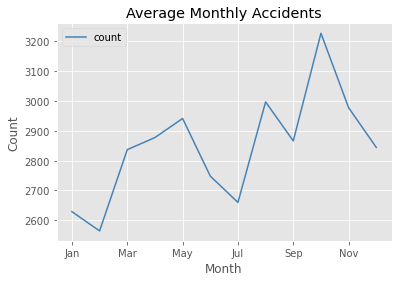

In [50]:
groupby_month_plot(data,"Average Monthly Accidents", "Month","Count", "steelblue", 5)

In [ ]:
groupby_month_plot(data_2018,"Monthly Total Accidents 2018", "Month","Count", "steelblue", 1)

In [ ]:
groupby_month_plot(data_2019,"Monthly Total Accidents 2019", "Month","Count", "lightslategray",1)

In [ ]:
#Plot bar plot to compare between line plot to see which one is better for the same data
plt.rcParams["figure.figsize"] = (8,6)
ax = by_month_2017_ordered.plot.bar(y='Accident Number', rot=0, color ='dodgerblue')
plt.xlabel("Month")
plt.ylabel("Number of Accident")
plt.title("Monthly Traffic Accident 2017")

---
## Q4. Did the weather condition cause the accidents?

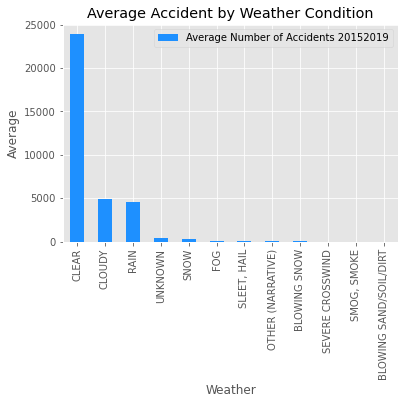

In [54]:
Average_Accidents_by_Weather =accident_by_weather(data, 2015_2019, 5)
Average_Accidents_by_Weather
plt.rcParams["figure.figsize"] = (6,4)
ax = Average_Accidents_by_Weather.plot.bar(y='Average Number of Accidents 20152019', rot=90, color = "dodgerblue")
plt.xlabel("Weather");
plt.ylabel("Average");
plt.title("Average Accident by Weather Condition");

## Q5. What is injury rate? What is fatality rate?


In [80]:
injury_rate(data_2015, 2015, 23704507)
injury_rate(data_2016, 2016, 24582377)
injury_rate(data_2017, 2017, 25658830)
injury_rate(data_2018, 2018, 26038272)
injury_rate(data_2019, 2019, 26038272)

Injuried Persons Per 100000 VMT in 2015 : 49.58
Injuried Persons Per 100000 VMT in 2016 : 52.53
Injuried Persons Per 100000 VMT in 2017 : 50.74
Injuried Persons Per 100000 VMT in 2018 : 48.76
Injuried Persons Per 100000 VMT in 2019 : 52.29


In [81]:
fatality_rate(data_2015, 2015, 679793)
fatality_rate(data_2016, 2016, 685829)
fatality_rate(data_2017, 2017, 687159)
fatality_rate(data_2018, 2018, 690516)
fatality_rate(data_2019, 2019, 694144)

Fatality Per 100000 Population in 2015: 14.42
Fatality Per 100000 Population in 2016: 15.31
Fatality Per 100000 Population in 2017: 14.7
Fatality Per 100000 Population in 2018: 14.77
Fatality Per 100000 Population in 2019: 17.43


## Q6. Monthy, Weekly, Daily Average Accidents for each year


In [83]:
monthly_weekly_daily_average_accident(data_2015, 2015)
monthly_weekly_daily_average_accident(data_2016, 2016)
monthly_weekly_daily_average_accident(data_2017, 2017)
monthly_weekly_daily_average_accident(data_2018, 2018)
monthly_weekly_daily_average_accident(data_2019, 2019)

Monthly Average Accidents 2015: 2696.0
Weekly Average Accidents 2015: 622.0
Daily Average Accidents 2015: 89.0
Monthly Average Accidents 2016: 2875.0
Weekly Average Accidents 2016: 663.0
Daily Average Accidents 2016: 95.0
Monthly Average Accidents 2017: 2894.0
Weekly Average Accidents 2017: 668.0
Daily Average Accidents 2017: 95.0
Monthly Average Accidents 2018: 2882.0
Weekly Average Accidents 2018: 665.0
Daily Average Accidents 2018: 95.0
Monthly Average Accidents 2019: 2891.0
Weekly Average Accidents 2019: 667.0
Daily Average Accidents 2019: 95.0


---

## Q7. Which zip_code has the most accidents?

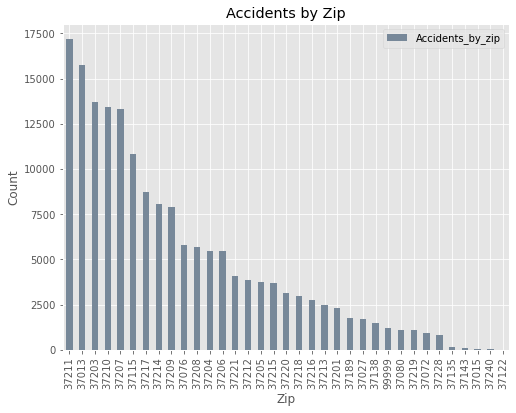

In [84]:
plot_accident_by_zip(data, "Accidents by Zip", "Zip", "Count", "lightslategray")

---
## Merge same dataframes for PowerPoint Presentation

In [ ]:
# # Merge Dataframe groupby city
# df = accident_by_city_2017.merge(accident_by_city_2018, left_index=True, right_index=True) 
# df_city_combined = df.merge(accident_by_city_2019, left_index=True, right_index=True)
# df_city_combined= df_city_combined.merge(accident_by_city_2015,left_index=True, right_index=True ).merge(accident_by_city_2015,left_index=True, right_index=True)
# #df_city_combined.to_csv('By_city_Accidents_combined.csv')